In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
#import csv
calendardf = pd.read_csv("SeattleAirbnbData/calendar.csv")
listingsdf = pd.read_csv("SeattleAirbnbData/listings.csv")
reviewsdf = pd.read_csv("SeattleAirbnbData/reviews.csv")

In [3]:
calendardf.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [4]:
listingsdf.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [5]:
reviewsdf.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


In [6]:
listingsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [19]:
# Remove any row without review scores, cleanliness, instant bookable and cleaning fee.

def clean_data (df):
    #drop rows without review_scores_ratings
    df = df.dropna(subset=['review_scores_rating'],axis=0)
    X = df
    return X

ListingsDFV2 = clean_data(listingsdf)
ListingsDFV2

#Now we have a dataframe with no "Nan" for review_scores_rating.

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,262764,https://www.airbnb.com/rooms/262764,20160104002432,2016-01-04,Fremont Farmhouse,Our 2BR/1 bath home in Fremont's most fun neig...,"1200 ft2 2BR, 1 Bath farmhouse with a large, t...",Our 2BR/1 bath home in Fremont's most fun neig...,none,We love that Fremont is so centrally located t...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.56
3811,8578490,https://www.airbnb.com/rooms/8578490,20160104002432,2016-01-04,Super Convenient Top Floor Apt,In the true spirit of AirBNB this unit is avai...,The building is older (1970's) so not the mode...,In the true spirit of AirBNB this unit is avai...,none,I am equidistant to Fremont and Wallingford an...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,0.63
3812,3383329,https://www.airbnb.com/rooms/3383329,20160104002432,2016-01-04,OF THE TREE & CLOUDS. KID FRIENDLY!,"Of the Tree & Clouds' ""Roots"" apartment is 8 b...","The 1-bedroom, ground-floor Roots apartment is...","Of the Tree & Clouds' ""Roots"" apartment is 8 b...",none,It's taken me a while to figure out why Fremon...,...,10.0,f,NaN,WASHINGTON,t,moderate,t,t,3,4.01
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30


## Here are the three questions I would like to discover about.

### 1. What is the correlation between ratings versus other scores given by reviews?

### 2.

### 3.

In [72]:
# Question 1: What other reviews affect review ratings?

RatingsDF = ListingsDFV2[['review_scores_rating','review_scores_cleanliness', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_communication', 'review_scores_value']]

RatingsDF

,review_scores_rating,review_scores_cleanliness,review_scores_accuracy,review_scores_checkin,review_scores_communication,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,10.0
1,96.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0
4,92.0,9.0,9.0,10.0,10.0,9.0
5,95.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...
3810,92.0,8.0,9.0,10.0,10.0,8.0
3811,100.0,8.0,9.0,10.0,10.0,10.0
3812,96.0,10.0,10.0,10.0,10.0,10.0
3813,80.0,10.0,8.0,4.0,8.0,8.0


In [73]:
RatingsDF= RatingsDF.dropna()
RatingsDF

,review_scores_rating,review_scores_cleanliness,review_scores_accuracy,review_scores_checkin,review_scores_communication,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,10.0
1,96.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0
4,92.0,9.0,9.0,10.0,10.0,9.0
5,95.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...
3810,92.0,8.0,9.0,10.0,10.0,8.0
3811,100.0,8.0,9.0,10.0,10.0,10.0
3812,96.0,10.0,10.0,10.0,10.0,10.0
3813,80.0,10.0,8.0,4.0,8.0,8.0


## Everyone who left a review has left a rating for each category.
## Therefore, no rows to drop.

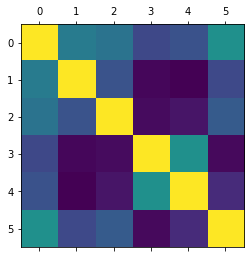

In [74]:
# Correlation Matrix
plt.matshow(RatingsDF.corr())
plt.show()

In [75]:
RatingsDF

,review_scores_rating,review_scores_cleanliness,review_scores_accuracy,review_scores_checkin,review_scores_communication,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,10.0
1,96.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0
4,92.0,9.0,9.0,10.0,10.0,9.0
5,95.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...
3810,92.0,8.0,9.0,10.0,10.0,8.0
3811,100.0,8.0,9.0,10.0,10.0,10.0
3812,96.0,10.0,10.0,10.0,10.0,10.0
3813,80.0,10.0,8.0,4.0,8.0,8.0


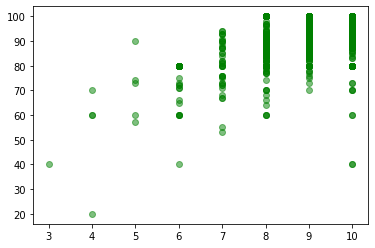

In [80]:
#Scatterplot - Rating x cleanliness
y = RatingsDF.review_scores_rating
x = RatingsDF.review_scores_cleanliness
plt.scatter(x, y, alpha=0.5, color = 'green')
plt.show()

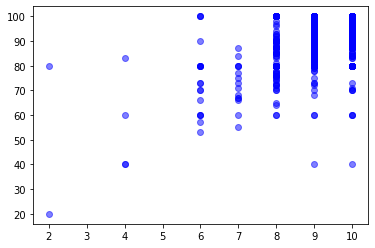

In [81]:
#Scatterplot - Rating x accuracy
y = RatingsDF.review_scores_rating
x = RatingsDF.review_scores_accuracy
plt.scatter(x, y, alpha=0.5, color = 'blue')
plt.show()

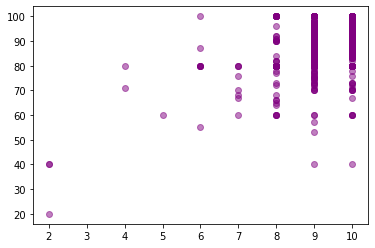

In [82]:
#Scatterplot - Rating x review_scores_communication
y = RatingsDF.review_scores_rating
x = RatingsDF.review_scores_communication
plt.scatter(x, y, alpha=0.5, color = 'purple')
plt.show()

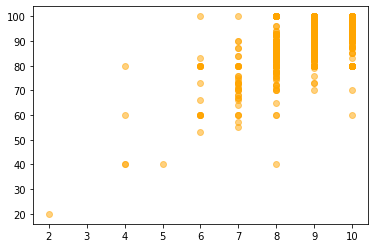

In [84]:
#Scatterplot - Rating x review_scores_value
y = RatingsDF.review_scores_rating
x = RatingsDF.review_scores_value
plt.scatter(x, y, alpha=0.5, color = 'orange')
plt.show()

In [69]:
x

0        95.0
1        96.0
2        97.0
4        92.0
5        95.0
        ...  
3810     92.0
3811    100.0
3812     96.0
3813     80.0
3814    100.0
Name: review_scores_rating, Length: 3158, dtype: float64

In [70]:
y

,review_scores_cleanliness,review_scores_cleanliness
0,10.0,10.0
1,10.0,10.0
2,10.0,10.0
4,9.0,9.0
5,10.0,10.0
...,...,...
3810,8.0,8.0
3811,8.0,8.0
3812,10.0,10.0
3813,10.0,10.0


In [146]:
# split X = review ratings and Y = clealiness and train hte model in a linear regression.

X = RatingsDF[['review_scores_cleanliness', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication']]

y = RatingsDF[['review_scores_rating']]

# Split data into training and test data, fit into a linear model

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state = 42)
lm_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_model.fit(X_train, y_train)
except:
    print("Oh no! It doesn't work!!!")

In [147]:
y_test_preds = lm_model.predict(X_test)# Predictions here
r_test = r2_score(y_test, y_test_preds) # Rsquared here

# Print r2 to see result
r_test

0.5405278387021724

In [ ]:
# Question 2: What actually impacts for a lower review? Query for < 6 and look for insights?

In [168]:
LowRatingsDF=listingsdf
LowRatingsDF.review_scores_rating = (listingsdf['review_scores_rating'].astype(float))


In [170]:
LowRatingsDF = LowRatingsDF[LowRatingsDF['review_scores_rating']<70.0]


In [172]:
LowReviewRatings = LowRatingsDF.dropna(subset=['review_scores_rating'], axis=0)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
716,1549973,https://www.airbnb.com/rooms/1549973,20160104002432,2016-01-04,Spacious Fast Internet Walk to UW43,100 rare walk score! 3 min walk to UW. Clean ...,Furnished one bedroom apartments in a quiet bu...,100 rare walk score! 3 min walk to UW. Clean ...,none,It is located in the bustling and vibrant Univ...,...,6.0,f,NaN,WASHINGTON,f,moderate,f,f,34,0.25
735,6250399,https://www.airbnb.com/rooms/6250399,20160104002432,2016-01-04,Center UW Comfy Wood Floor (216),It has a rare Walk Score 98 !--Walker's Paradi...,Large clean furnished studio on the 2nd floor ...,It has a rare Walk Score 98 !--Walker's Paradi...,none,It is located in the bustling and vibrant Univ...,...,4.0,f,NaN,WASHINGTON,f,strict,f,f,34,0.22
748,3085726,https://www.airbnb.com/rooms/3085726,20160104002432,2016-01-04,Across St. UW Tower Hotel Deca 206,It has a Walk Score of 98 out of 100--Walker's...,Large clean furnished hardwood floor studio on...,It has a Walk Score of 98 out of 100--Walker's...,none,It is located in the bustling and vibrant Univ...,...,6.0,f,NaN,WASHINGTON,f,strict,f,f,34,0.07
750,7071021,https://www.airbnb.com/rooms/7071021,20160104002432,2016-01-04,Center UW Quiet Comfy shortwalk 308,It has a Walk Score of 98 out of 100--Walker's...,Large clean furnished studio on the 3rd floor ...,It has a Walk Score of 98 out of 100--Walker's...,none,It is located in the bustling and vibrant Univ...,...,7.0,f,NaN,WASHINGTON,t,strict,f,f,34,0.83
756,1571230,https://www.airbnb.com/rooms/1571230,20160104002432,2016-01-04,Center UW Blast Internet New #102,It has a Walk Score of 98 out of 100--Walker's...,Beautiful room with Price reduced 1/3 for quie...,It has a Walk Score of 98 out of 100--Walker's...,none,It is located in the bustling and vibrant Univ...,...,7.0,f,NaN,WASHINGTON,f,moderate,f,f,34,0.42
789,3291777,https://www.airbnb.com/rooms/3291777,20160104002432,2016-01-04,Spacious and so close to UW (34),It has a Walk Score of 100--Walker's Paradise....,Furnished spacious one bedroom apartments in a...,It has a Walk Score of 100--Walker's Paradise....,none,It is located in the bustling and vibrant Univ...,...,7.0,f,NaN,WASHINGTON,f,moderate,f,f,34,0.37
790,3096191,https://www.airbnb.com/rooms/3096191,20160104002432,2016-01-04,View Walk to UW Village 2B 2B (402),New Listing! Large 2 bedroom 2 baths apt with ...,"Located in a quiet cul-de-sac, this spacious t...",New Listing! Large 2 bedroom 2 baths apt with ...,none,The famous Burke Gilman trail is near the apt ...,...,7.0,f,NaN,WASHINGTON,f,strict,f,f,11,0.44
806,9303530,https://www.airbnb.com/rooms/9303530,20160104002432,2016-01-04,2 Ba/2 Br Fast Wifi Walk to UW (35),It has a Walk Score of 100 out of 100--Walker'...,Rare found in the center of U District! Furnis...,It has a Walk Score of 100 out of 100--Walker'...,none,It is located in the bustling and vibrant Univ...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,11,0.88
969,7093910,https://www.airbnb.com/rooms/7093910,20160104002432,2016-01-04,Ted's modern home - 2nd master room,Built in 2015. Convenient to City - 10 min to...,This is listing for the second master room of ...,Built in 2015. Convenient to City - 10 min to...,none,NaN,...,6.0,f,NaN,WASHINGTON,f,strict,f,f,5,0.46
1076,9532861,https://www.airbnb.com/rooms/9532861,20160104002432,2016-01-04,Modern Loft in Pike Place,"Modern open style loft with exposed brick, 100...","minimal, modern loft downtown seattle exposed ...","Modern open style loft with exposed brick, 100...",none,"Downtown, across the street from Pike place ma...",...,6.0,f,NaN,WASHINGTON,f,moderate,f,f,1,0.81


In [173]:
#Cancellation Policy
LowReviewRatings.cancellation_policy.value_counts()

strict      11
moderate    10
flexible     7
Name: cancellation_policy, dtype: int64

### This indicates that the lower reviewed listings usually have stricter cancellation policy

In [174]:
#How many bedrooms?
LowReviewRatings.bedrooms.value_counts()


1.0    17
2.0     5
3.0     3
0.0     3
Name: bedrooms, dtype: int64

### 1 Bedrooms tend to have lower review ratings

In [ ]:
#Question 3: Select Categorical Variables

In [86]:
listingsdf.bedrooms

0       1.0
1       1.0
2       5.0
3       0.0
4       3.0
       ... 
3813    3.0
3814    1.0
3815    1.0
3816    0.0
3817    2.0
Name: bedrooms, Length: 3818, dtype: float64

In [87]:
listingsdf.availability_365

0       346
1       291
2       220
3       143
4       365
       ... 
3813     32
3814    273
3815     88
3816    179
3817      7
Name: availability_365, Length: 3818, dtype: int64

In [122]:
#object
listingsdf.price

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [100]:
# Convert from Object to float.

listingsdf.price = (listingsdf['price'].replace( '[\$,)]','', regex=True ).astype(float))

In [117]:
print(listingsdf.space.head(5))
print(listingsdf.city.head(5)) #could use for analysis
print(listingsdf.minimum_nights.head(5)) #could use for analysis
print(listingsdf.amenities.head(5)) #requires regex? may be too troublesome

0    Make your self at home in this charming one-be...
1    Beautiful, hypoallergenic apartment in an extr...
2    Our house is modern, light and fresh with a wa...
3                                                  NaN
4    Cozy family craftman house in beautiful neighb...
Name: space, dtype: object
0    Seattle
1    Seattle
2    Seattle
3    Seattle
4    Seattle
Name: city, dtype: object
0    1
1    2
2    4
3    1
4    1
Name: minimum_nights, dtype: int64
0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object


In [131]:
#Select all Numeric Columns
numericdf = listingsdf.select_dtypes(include=['float', 'int'])
#It will contain these columns
numericdf

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,20160104002432,31148752,354.0,354.0,47.664295,-122.359170,6,2.0,3.0,...,80.0,8.0,10.0,4.0,8.0,10.0,8.0,NaN,8,0.30
3814,8902327,20160104002432,46566046,1.0,1.0,47.649552,-122.318309,4,1.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1,2.00
3815,10267360,20160104002432,52791370,1.0,1.0,47.508453,-122.240607,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3816,9604740,20160104002432,25522052,1.0,1.0,47.632335,-122.275530,2,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [132]:
#check null values
numericdf.isnull()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3814,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3815,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,True
3816,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,True


In [130]:
numericdf

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [133]:
numericdf.price.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3813    False
3814    False
3815    False
3816    False
3817    False
Name: price, Length: 3818, dtype: bool

In [179]:
X = numericdf.price

In [180]:
X.dtype
#Converted to float

dtype('float64')

In [182]:
Y = numericdf.drop(['price'],axis=1)

In [183]:
Y

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,20160104002432,31148752,354.0,354.0,47.664295,-122.359170,6,2.0,3.0,...,80.0,8.0,10.0,4.0,8.0,10.0,8.0,NaN,8,0.30
3814,8902327,20160104002432,46566046,1.0,1.0,47.649552,-122.318309,4,1.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1,2.00
3815,10267360,20160104002432,52791370,1.0,1.0,47.508453,-122.240607,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3816,9604740,20160104002432,25522052,1.0,1.0,47.632335,-122.275530,2,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [191]:
#Drop All Who Do not have review_score values
Y = Y.dropna(subset=['review_scores_rating'],axis=0)

In [192]:
Y

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89
5,5956968,20160104002432,326758,1.0,1.0,47.630525,-122.366174,2,1.0,1.0,...,95.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1,2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,262764,20160104002432,1379138,1.0,1.0,47.654205,-122.352604,5,1.0,2.0,...,92.0,9.0,8.0,10.0,10.0,10.0,8.0,NaN,1,1.56
3811,8578490,20160104002432,11847918,1.0,1.0,47.657898,-122.346692,3,1.0,1.0,...,100.0,9.0,8.0,10.0,10.0,10.0,10.0,NaN,1,0.63
3812,3383329,20160104002432,3443346,3.0,3.0,47.654516,-122.358124,4,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,3,4.01
3813,8101950,20160104002432,31148752,354.0,354.0,47.664295,-122.359170,6,2.0,3.0,...,80.0,8.0,10.0,4.0,8.0,10.0,8.0,NaN,8,0.30


In [193]:
Y.info

<bound method DataFrame.info of            id       scrape_id   host_id  host_listings_count  \
0      241032  20160104002432    956883                  3.0   
1      953595  20160104002432   5177328                  6.0   
2     3308979  20160104002432  16708587                  2.0   
4      278830  20160104002432   1452570                  2.0   
5     5956968  20160104002432    326758                  1.0   
...       ...             ...       ...                  ...   
3810   262764  20160104002432   1379138                  1.0   
3811  8578490  20160104002432  11847918                  1.0   
3812  3383329  20160104002432   3443346                  3.0   
3813  8101950  20160104002432  31148752                354.0   
3814  8902327  20160104002432  46566046                  1.0   

      host_total_listings_count   latitude   longitude  accommodates  \
0                           3.0  47.636289 -122.371025             4   
1                           6.0  47.639123 -122.365666 

In [195]:
Y.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.171000e+03,3.171000e+03,3.171000e+03,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3159.000000,3165.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3171.000000,3171.000000
mean,5.017752e+06,2.016010e+13,1.437149e+07,6.933459,6.933459,47.628684,-122.332870,3.384421,1.258943,1.302686,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.990224,2.089722
std,2.801376e+06,0.000000e+00,1.343307e+07,25.541214,25.541214,0.042962,0.031571,1.991495,0.594381,0.874565,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.955426,1.822827
min,4.291000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,2.694596e+06,2.016010e+13,3.074414e+06,1.000000,1.000000,47.608762,-122.353981,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.705000
50%,5.289293e+06,2.016010e+13,9.469827e+06,1.000000,1.000000,47.623076,-122.328980,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.550000
75%,7.454547e+06,2.016010e+13,2.347934e+07,3.000000,3.000000,47.662419,-122.310570,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.010000
max,1.024814e+07,2.016010e+13,5.076344e+07,502.000000,502.000000,47.733358,-122.254189,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [206]:
Y.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee81c61750>,
      dtype=object)

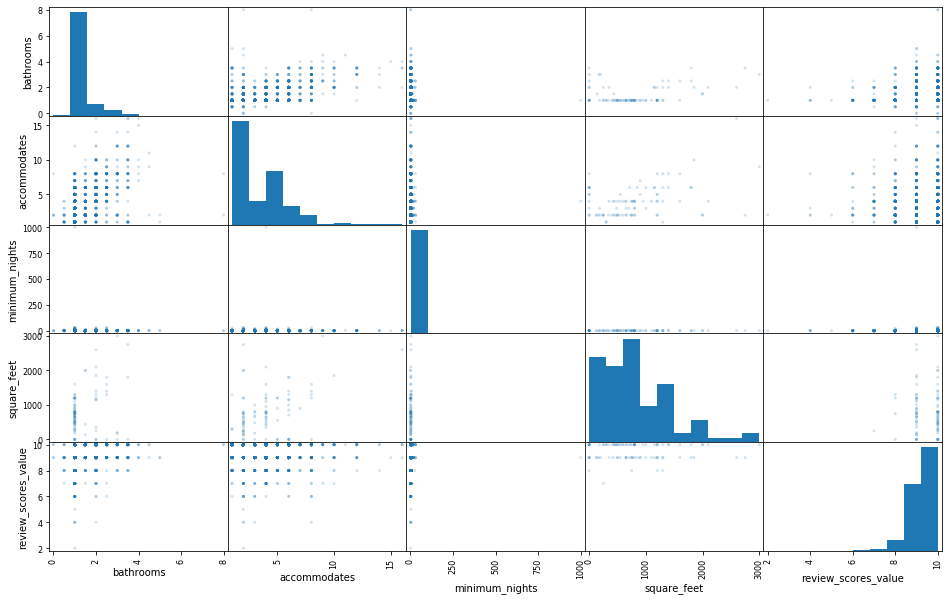

In [218]:
#Pick several columns for correlation matrix
Ycorr = Y[['bathrooms','accommodates','minimum_nights','square_feet', 'review_scores_value']]
pd.plotting.scatter_matrix(Ycorr, alpha=0.2, figsize=(16, 10))

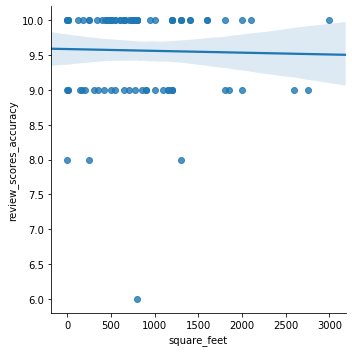

In [221]:
import seaborn as sns

sns.lmplot(data=Y, x="square_feet", y="review_scores_accuracy")

# Handling Categorical Variables

In [254]:
# impute values by inserting dummy variables
def create_dummy_df(df, cat_cols, dummy_na):
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [256]:
#Dropping where the salary has missing values
cat_var  = listingsdf.dropna(subset=['review_scores_value'], axis=0)

#Pull a list of the column names of the categorical variables
cat_df = cat_var.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df_new = create_dummy_df(listingsdf, cat_cols_lst, dummy_na=False) #Use your newly created function

print(df_new.shape)

(3818, 60097)


In [257]:
#values are all imputed. There should not be any nans.
df_new

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,last_review_2015-12-30,last_review_2015-12-31,last_review_2016-01-01,last_review_2016-01-02,last_review_2016-01-03,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,0,0,0,1,0,0,1,0,0,0
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,0,0,0,0,0,0,0,1,1,1
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,0,0,0,0,0,0,0,1,0,0
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,20160104002432,31148752,354.0,354.0,47.664295,-122.359170,6,2.0,3.0,...,0,0,0,0,0,0,0,1,0,0
3814,8902327,20160104002432,46566046,1.0,1.0,47.649552,-122.318309,4,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
3815,10267360,20160104002432,52791370,1.0,1.0,47.508453,-122.240607,2,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
3816,9604740,20160104002432,25522052,1.0,1.0,47.632335,-122.275530,2,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [259]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'review_scores_value', cat_cols_lst, dummy_na=False)

In [260]:
test_score

0.18386215198953337